In [30]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer, MinMaxScaler
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import boston_housing, mnist

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [33]:
model = Sequential()
model.add( Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu') )
model.add( Conv2D(32, (2, 2),  activation='relu') )
model.add( MaxPool2D(pool_size=(2,2)) )
model.add( Conv2D(32, (2, 2),  activation='relu') )
model.add( MaxPool2D(pool_size=(2,2)) )
model.add( Flatten() )
model.add( Dense(400, activation='sigmoid') )
model.add( Dense(200, activation='sigmoid') )
model.add( Dense(10, activation='sigmoid') )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 32)        4128      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
__________

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [36]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 18s 292us/step - loss: 0.0586
Epoch 2/5
60000/60000 [==============================] - 18s 295us/step - loss: 0.0526
Epoch 3/5
60000/60000 [==============================] - 18s 302us/step - loss: 0.0503
Epoch 4/5
60000/60000 [==============================] - 18s 306us/step - loss: 0.0494
Epoch 5/5
60000/60000 [==============================] - 18s 298us/step - loss: 0.0484


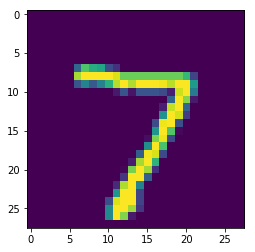

7



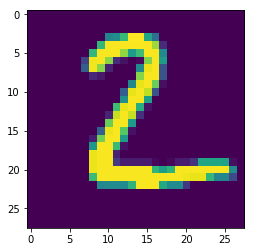

2



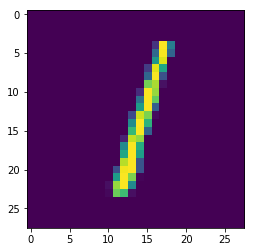

1



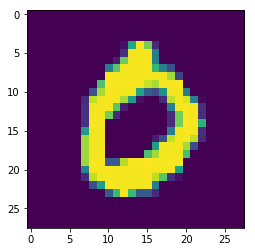

0



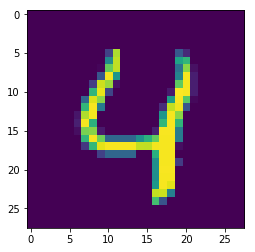

4



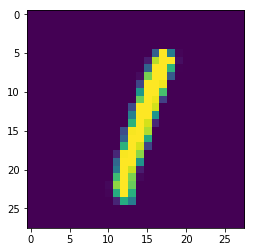

1



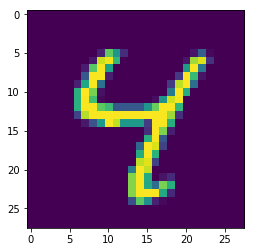

4



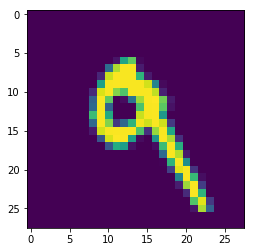

9



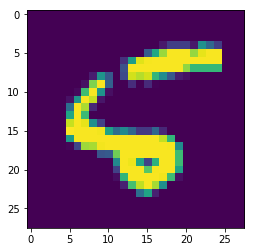

5



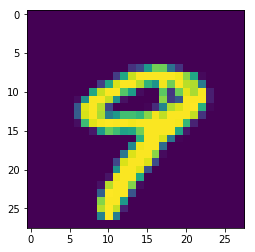

9



In [50]:
for x, y in list(zip(x_test, y_test))[:10]:
    plt.imshow(x[:, :, 0])
    plt.show()
    pred = model.predict(x.reshape(1, 28, 28, 1))
    pred = np.argmax(pred[0])
    print(pred)
    print()